In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Admission_Predict.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mohansacharya/graduate-admissions",
  file_path
)

c:\Users\aksha\OneDrive\Desktop\DL\tfenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\aksha\AppData\Local\Temp\ipykernel_20428\2778293935.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 12.6k/12.6k [00:00<00:00, 5.15MB/s]


In [3]:
df.drop(columns='Serial No.', inplace=True)

In [16]:
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [14]:
X = df.drop(columns='Chance of Admit ')
y = df['Chance of Admit '].copy()

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=42, shuffle=True)

In [17]:
scaler = MinMaxScaler()

xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [32]:
model = Sequential()

model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(1, activation='linear'))

c:\Users\aksha\OneDrive\Desktop\DL\tfenv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [34]:
history = model.fit(xtrain_scaled, ytrain, epochs=100, validation_split=0.1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1478 - val_loss: 0.1522
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1234 - val_loss: 0.1261
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1014 - val_loss: 0.1021
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0817 - val_loss: 0.0805
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0644 - val_loss: 0.0622
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0497 - val_loss: 0.0474
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0387 - val_loss: 0.0360
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0306 - val_loss: 0.0281
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0252 - val_loss: 0.0235
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0221 - val_loss: 0.0220
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0207 - val_loss: 0.0216
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0202 - val_loss: 0.02

In [37]:
import matplotlib.pyplot as plt

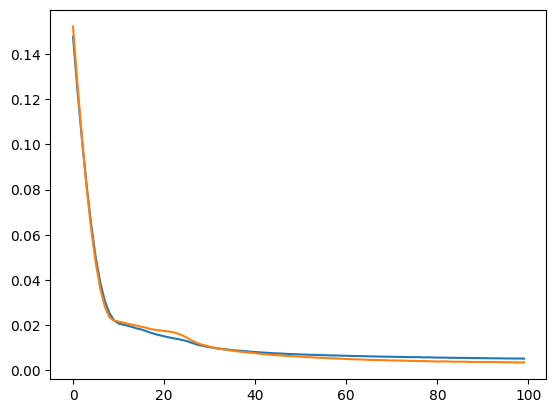

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [39]:
ypred = model.predict(xtest_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [40]:
ypred

array([[0.63756794],
       [0.68608224],
       [0.9490851 ],
       [0.8162253 ],
       [0.53592056],
       [0.9798352 ],
       [0.47179496],
       [0.5369021 ],
       [0.64702123],
       [0.74205697],
       [0.7153344 ],
       [0.86888826],
       [0.6177977 ],
       [0.8770627 ],
       [0.6608263 ],
       [0.5888484 ],
       [0.6467532 ],
       [0.50820243],
       [0.67914283],
       [0.9782005 ],
       [0.5348481 ],
       [0.6496964 ],
       [0.6632063 ],
       [0.50490564],
       [0.9413066 ],
       [0.75370246],
       [0.64976865],
       [0.5466627 ],
       [0.6392005 ],
       [0.757739  ],
       [0.7617638 ],
       [0.9898851 ],
       [0.65848565],
       [0.3626271 ],
       [0.68771255],
       [0.5825276 ],
       [0.7608163 ],
       [0.6429674 ],
       [0.6360367 ],
       [0.8093351 ],
       [0.7160761 ],
       [0.6461629 ],
       [0.76612496],
       [0.99695915],
       [0.84687114],
       [0.81676954],
       [0.89524955],
       [0.651

In [41]:
r2_score(ytest, ypred)

0.7538253076319137